# Introduction to Matplotlib

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[]

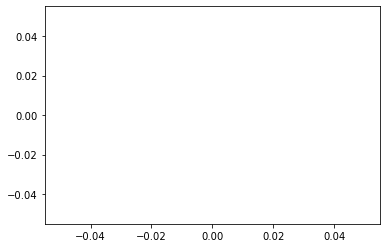

In [2]:
plt.plot()

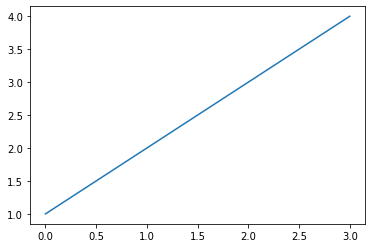

In [3]:
plt.plot([1,2,3,4])
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].


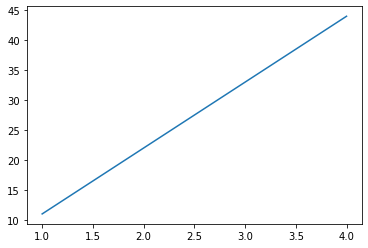

In [4]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y); #put ; to remove [<matplotlib.lines.Line2D at 0x7fbfdd49e430>]

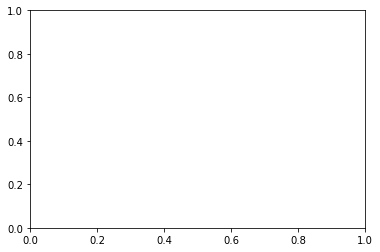

In [5]:
# Creating a plot with the OO verison, confusing way first
# 1st method
fig = plt.figure() #Create a figure
ax = fig.add_subplot() #adds some axs
plt.show()

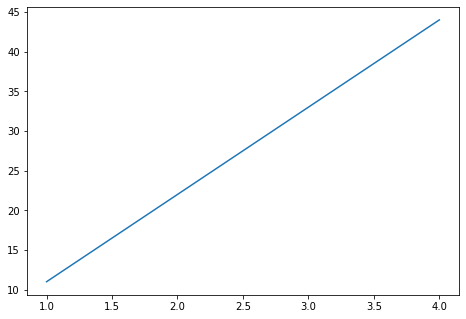

In [6]:
# Second Method
fig = plt.figure() #create a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) #add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

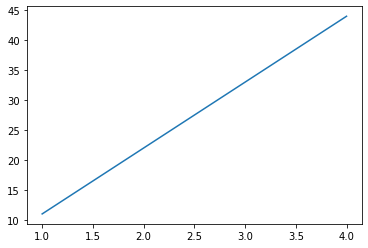

In [7]:
# 3rd method (recommeded)

fig, ax = plt.subplots() #create figure + set of subplots, by default, nrow =1, ncol=1
ax.plot(x,y); #add some data

type(fig), type(ax)

# Matplotlib Example Workflow

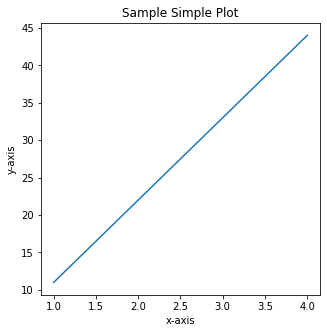

In [8]:
# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(5,5)) #Figure size = Width & Height of the Plot

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", 
       xlabel="x-axis", 
       ylabel="y-axis");

# 5. Save & show
#fig.savefig("../images/simple-plot.png")

# Scatter & Bar Plot
## Making figures with Numpy arrays

* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

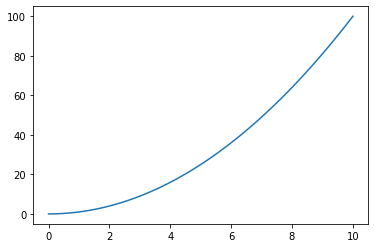

In [10]:
#plot the data & create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

# Scatter

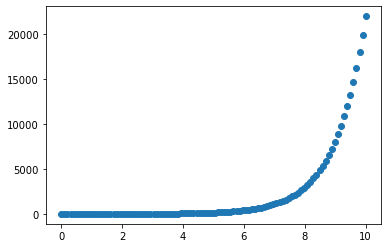

In [11]:
#Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

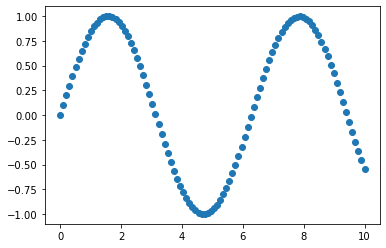

In [12]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

# Bar 
* Vertical 
* Horizontal

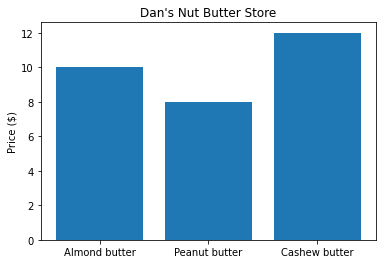

In [13]:
# Make a plot from dictionary
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

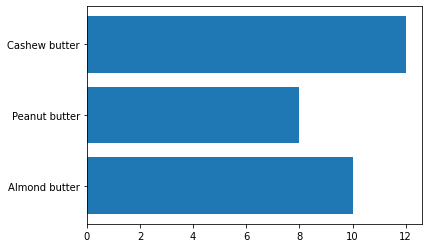

In [14]:
fig, ax = plt.subplots()
#print(nut_butter_prices.keys()) : need to list (keys & values) before providing to barh() function 
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

# Histogram (Hist)
* Could show image of normal distribution here

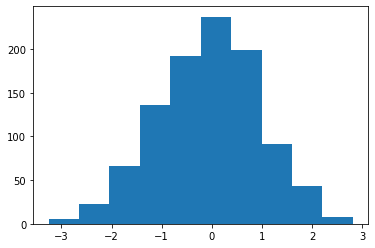

In [15]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

# Two options for subplots


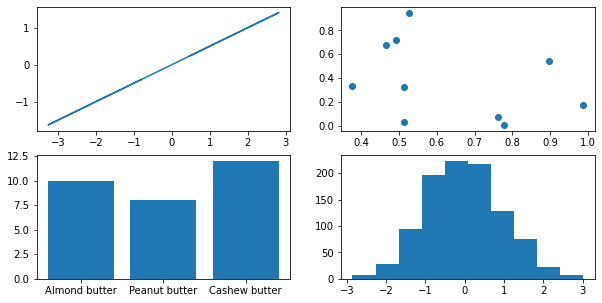

In [16]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

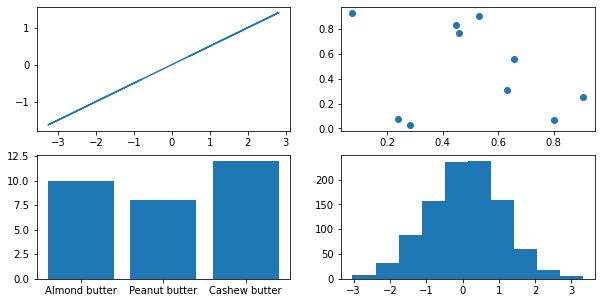

In [17]:
# Option 2: 
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2,
                       figsize=(10,5))
# Plot data to each index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plot from Pandas DataFrames

In [18]:
import pandas as pd

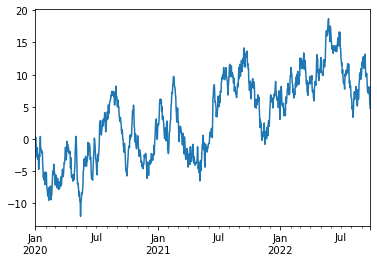

In [19]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2020", periods =1000))
ts = ts.cumsum()
ts.plot();

In [20]:
# Make a datafram
car_sales = pd.read_csv("./data/car-sales.csv")

In [21]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [22]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

<ipython-input-22-737e371af5b4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [23]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))

In [25]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [26]:
car_sales["Total Sales"] = car_sales["Price"].astype('int').cumsum()

In [27]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


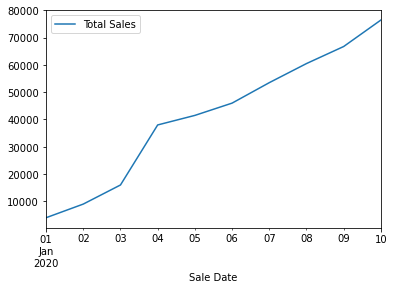

In [28]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

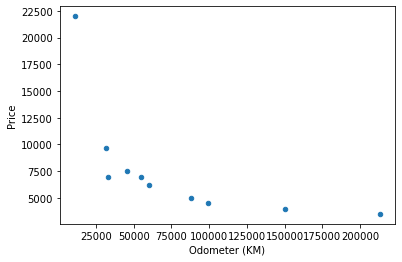

In [29]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [30]:
# How about bar graph ?
x = np.random.rand(10,4)

In [31]:
# Turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.777038,0.307986,0.744895,0.442439
1,0.359149,0.101468,0.104037,0.579545
2,0.978318,0.350804,0.393115,0.598434
3,0.006890,0.211828,0.926755,0.838906
4,0.835780,0.173417,0.231063,0.972235
5,0.227187,0.654955,0.463618,0.055768
6,0.872019,0.454439,0.637429,0.623895
7,0.881507,0.731313,0.430519,0.538850
8,0.661070,0.322862,0.930228,0.840068
9,0.475307,0.759270,0.529721,0.332725


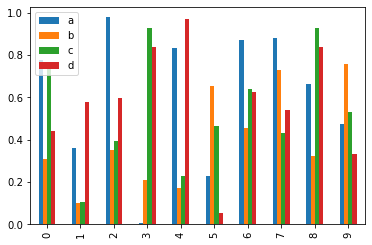

In [32]:
df.plot.bar();

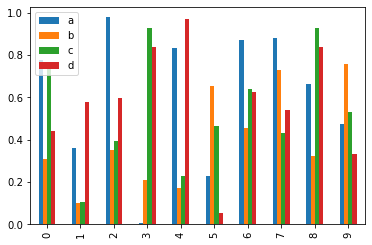

In [33]:
df.plot(kind="bar");

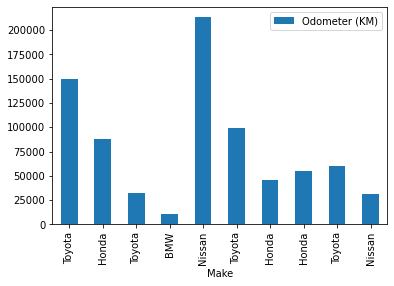

In [34]:
car_sales.plot(x="Make", y = "Odometer (KM)", kind="bar");

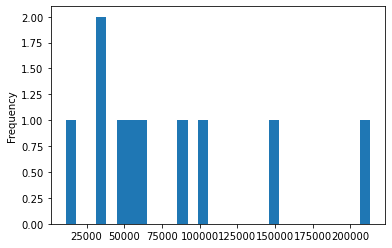

In [35]:
car_sales["Odometer (KM)"].plot.hist(bins = 30); # 

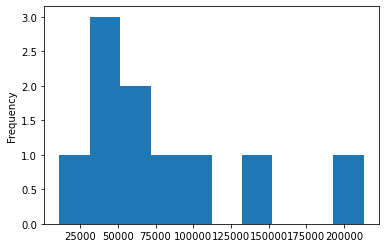

In [36]:
car_sales["Odometer (KM)"].plot(kind="hist");

In [37]:
# Let s try on another dataset
heart_disease = pd.read_csv("./data/heart-disease.csv")

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


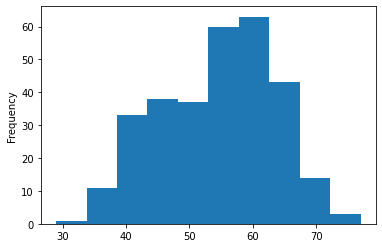

In [39]:
# Create Histogram of Age to see the distribution of age

heart_disease["age"].plot.hist(bins=10);

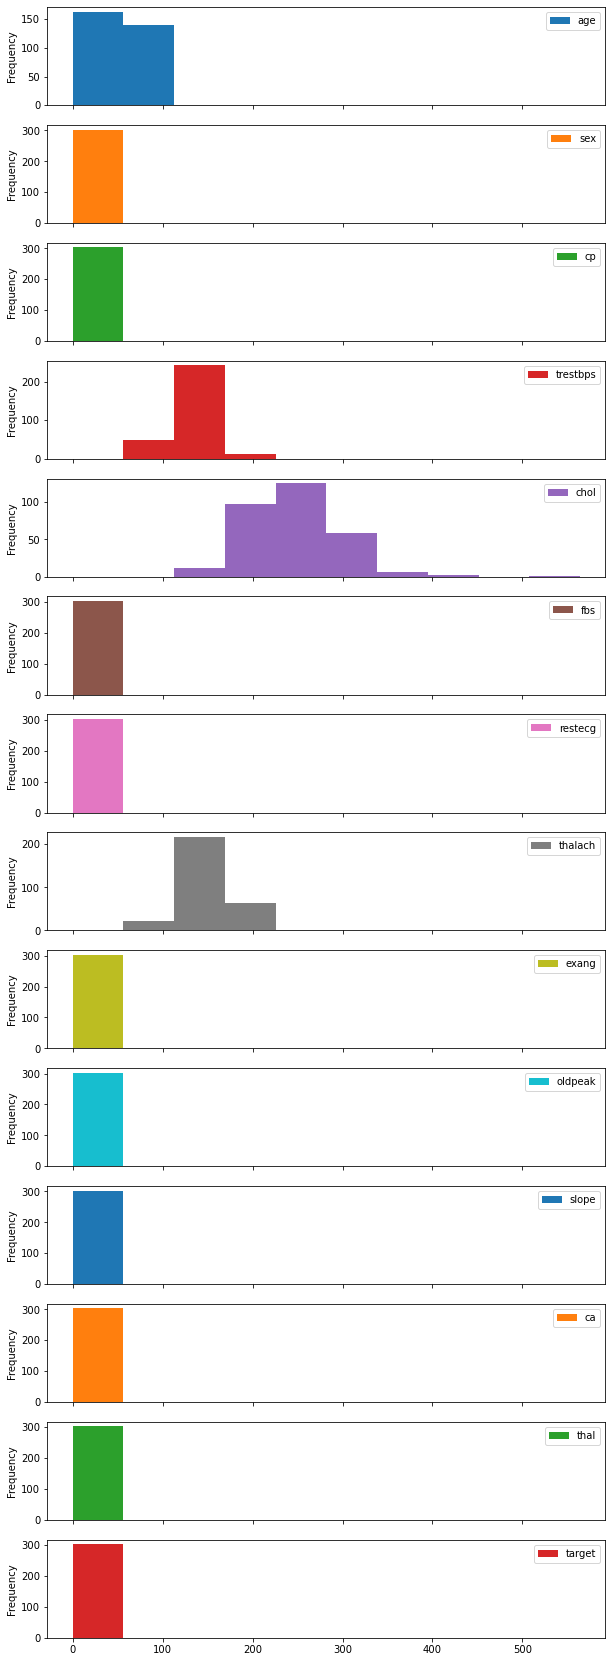

In [40]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

### Which one should you use ? (Pyplot vs Matplotlib OO Method)

* When plotting something quickly, okay to use Pyplot Method
* When plotting something advanced, use Matplotlib OO Method

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [43]:
len(over_50)

208

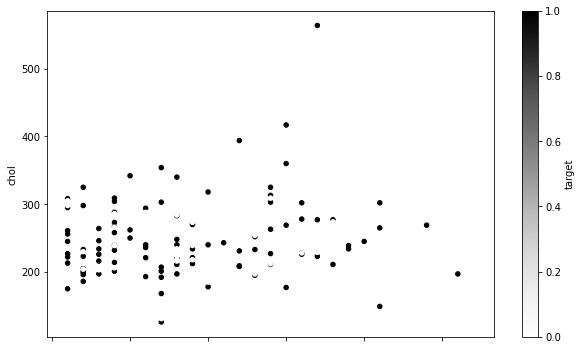

In [44]:
# Pyplot method
over_50.plot(kind = 'scatter',
             x = 'age',
             y = 'chol',
             c = 'target', #c = color the dot based on over_50['target'] col
             figsize=(10,6));

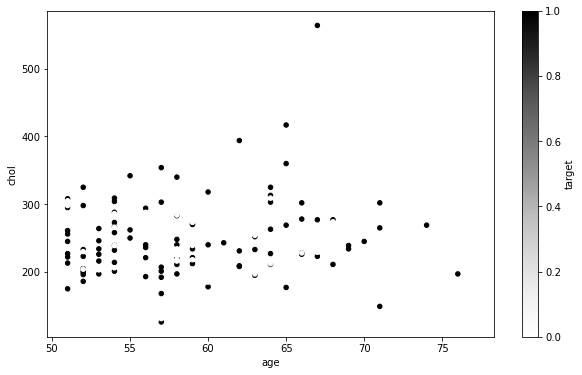

In [45]:
# OO Method mixed with PyPlot method

fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind = 'scatter',
             x = 'age',
             y = 'chol',
             c = 'target',
             ax = ax);
# ax.set_xlim([45,85])

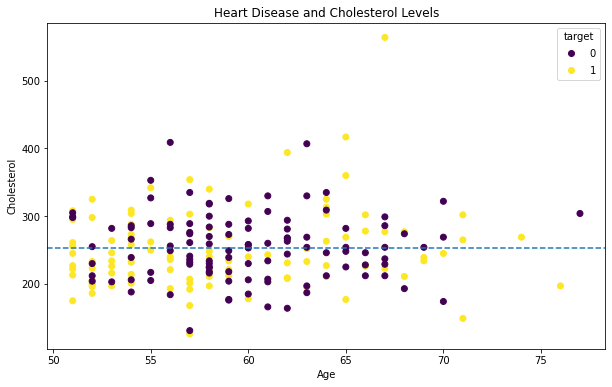

In [46]:
## OO Method from Scratch
fig, ax = plt.subplots(figsize=(10,6))

## Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
# Add a legend
ax.legend(*scatter.legend_elements(), title="target"); # * to unpack all the values of Title="target"

#Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle = "--");

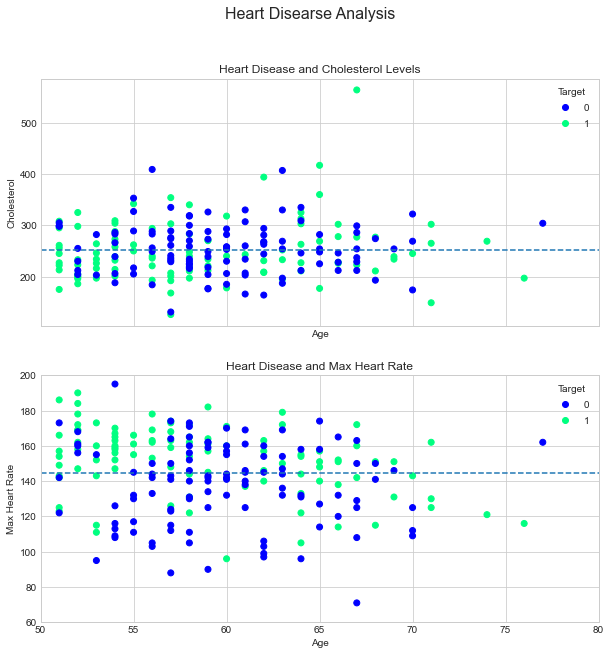

In [47]:
# Set the style
plt.style.use('seaborn-whitegrid')
# Subplots of Chol, age & Thalach

# Create a single fig with 2 axes
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize =(10,10),
                               sharex=True);

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter"); #cmap = color map changes the color scheme: prefer Matplotlib color maps
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol");

# Change the x axis limits of ax0
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target"); # * to unpack all the values of Title="target"

#Add a horizontal line
ax0.axhline(over_50["chol"].mean(), linestyle = "--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter");
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate");

# Change the x axis limits of ax0
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend to ax0
ax1.legend(*scatter.legend_elements(), title="Target"); # * to unpack all the values of Title="target"

#Add a horizontal line - mean
ax1.axhline(over_50["thalach"].mean(), linestyle = "--");


# Add Title to Figure
fig.suptitle("Heart Disearse Analysis", fontsize=16);

# Customizing x and y axis limitation


## Customizing Matplotlib Plots and getting Stylish

In [48]:
# See the different styles avail
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

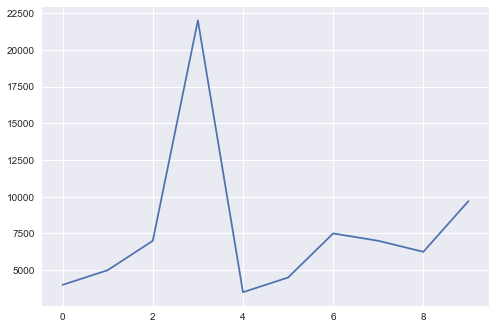

In [49]:
plt.style.use('seaborn')
car_sales["Price"].plot();

In [50]:
# Create some new data
x = np.random.randn(10,4)

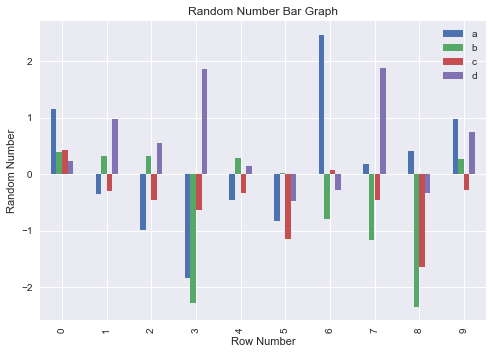

In [51]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
ax = df.plot(kind='bar');

# Customize our plot with the set() method
ax.set(title="Random Number Bar Graph",
       xlabel="Row Number",
       ylabel="Random Number");


In [55]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


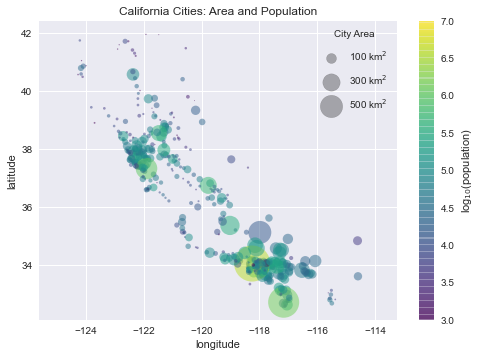

In [53]:
# Extract the data we're interested in - Longd = Kinh độ, Latd: Vĩ   
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');